<a href="https://colab.research.google.com/github/Weverton-Vitor/houseplants-classification-resnet/blob/main/house_plants_classification_resnet_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Plant classification using ResNet-34

# 0. Install and Import libs

In [1]:
import os
import requests
import zipfile
import shutil
import random
import torch
import numpy as np
import matplotlib.pyplot as plt
from typing import Dict, Literal

# 1. Exploring the data and create dataset objects

## 1.1 Getting and formatting the data set

In [2]:
data_path = './data1'
original_path = './house_plant_species'

In [3]:
!kaggle datasets download -d kacpergregorowicz/house-plant-species

Dataset URL: https://www.kaggle.com/datasets/kacpergregorowicz/house-plant-species
License(s): CC-BY-NC-SA-4.0
100% 4.85G/4.85G [03:00<00:00, 29.9MB/s]
100% 4.85G/4.85G [03:00<00:00, 28.8MB/s]


In [13]:
# Extract dataset
with zipfile.ZipFile('/content/house-plant-species.zip', 'r') as file_zip:
    file_zip.extractall()

## 1.2 Exploration

## 1.3 Formating folder structures to standart classification format
- /imagens
    - /train
      - /class1
      - /class2
      - /...
    - /validation
      - /class1
      - /class2
      - /...
    - /test
      - /class1
      - /class2
      - /...


Sampling will be done using python random.choices

In [15]:
# Returns a simple version of specie name
def get_specie_name(specie: str) -> str:
  specie_name = specie.split('(')[0].lower().replace(' ', '_')
  return specie_name[:len(specie_name)-1] if specie_name[-1] == '_' else specie_name


def create_dataset_folders(new_path: str, original_path: str) -> None:
  species = os.listdir(original_path)

  # General folders
  os.makedirs(f'{new_path}/train', exist_ok=True)
  os.makedirs(f'{new_path}/test', exist_ok=True)

  # Create folders for each specie
  for dataset in os.listdir(new_path):
      for specie in species:
        os.makedirs(f'{new_path}/{dataset}/{get_specie_name(specie)}', exist_ok=True)

# Random sampling for each catgory and retunrna dict with classes as key
# and test images as value
def get_test_images(path: str, test_size: float) -> Dict[str, str]:
  test_images = {}
  for specie in os.listdir(path):
    qty = len(os.listdir(f'{path}/{specie}'))
    test_qty = int(qty * test_size)
    print(f'{specie}: {qty}, {test_qty}')
    test_samples = random.sample(os.listdir(f'{path}/{specie}'), test_qty)
    test_images[specie] = test_samples

  return test_images

# Move test and train images to respective folders
def move_images(test_images: dict, original_path: str, new_path: str) -> None:

  # Move images test to test folder
  for specie, images in test_images.items():
    for image in images:
      shutil.move(f'{original_path}/{specie}/{image}', f'{new_path}/test/{get_specie_name(specie)}')

  # Move the rest os images to train folder
  for specie in os.listdir(original_path):
    for image in os.listdir(f'{original_path}/{specie}'):
      shutil.move(f'{original_path}/{specie}/{image}', f'{new_path}/train/{get_specie_name(specie)}')



In [6]:
create_dataset_folders(new_path=data_path, original_path=original_path)

test_images = get_test_images(path=original_path, test_size=0.2)

move_images(test_images=test_images,
            original_path=original_path,
            new_path=data_path)



## 1.4 Dataset objects

## 2. ResNet34 import vs ResNet34 from scratch

> Paper: [Deep Residual Learning for Image Recognition](https://arxiv.org/pdf/1512.03385)

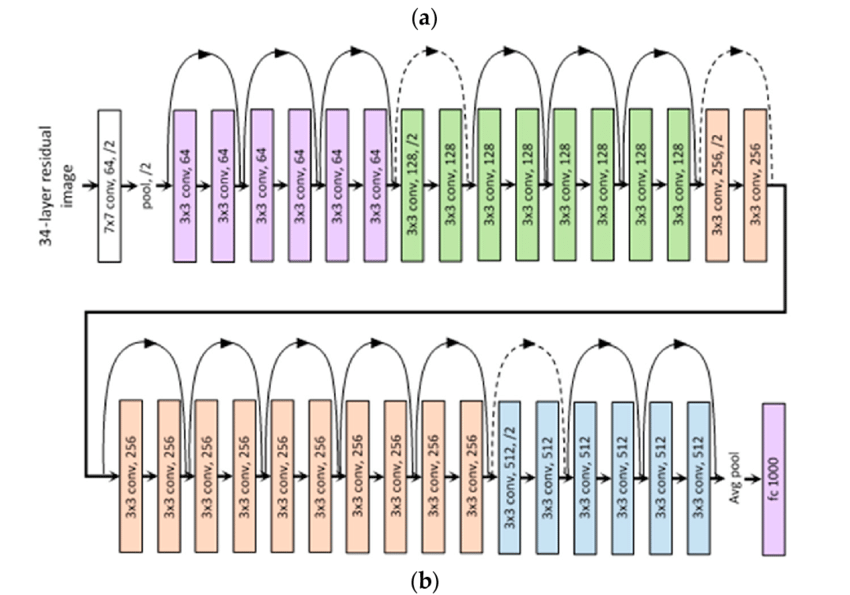

### 2.1 Import Resnet34

### 2.2 ResNet34 from scratch



#### 2.3 Residual Blocks

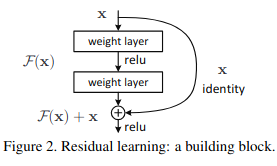 | 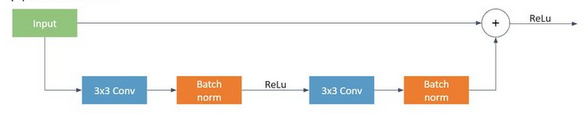

## 3. Training the models